### Importing the packages
First of all importing all the packages

In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Loading the Data

In [2]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

In [3]:
df = pd.read_csv("Xtr.csv",header=None)
df.head(5)

,0,1,2,3,4,5,6,7
0,0.0481,134.0,-23.3,8.63,0.368,16.7,-3.08,78.40
1,0.0939,67.2,-34.2,23.60,0.611,24.0,-3.45,6.28
2,0.1450,173.0,-42.6,-21.40,0.128,17.9,-3.21,3.39
3,0.3160,66.8,-96.2,97.00,0.100,28.0,-3.65,6.30
4,0.1890,43.7,-18.5,9.09,0.197,12.8,-3.05,62.30


### Standardizing the data 

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import sklearn

scale= MinMaxScaler()

Xtr_standardized = scale.fit_transform(Xtr) # revise this line as needed
Xts_standardized = scale.fit_transform(Xts) # revise this line as needed
ytr_standardized = ytr

X_train, X_test, y_train,y_test = train_test_split(Xtr, ytr, test_size = 0.2, random_state = 1)
X_train_std, X_test_std, y_train_std,y_test_std = train_test_split(Xtr_standardized, ytr_standardized, test_size = 0.2, random_state = 1)

In [5]:
# save the standardized training data
Xtr_savepath = 'Xtr_sklearn.csv'
Xts_savepath = 'Xts_sklearn.csv'
ytr_savepath = 'ytr_sklearn.csv'
yts_hat_savepath = 'yts_hat_sklearn.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

## Part (1) Applying Logistic Regression First 

In [6]:
from sklearn import linear_model, preprocessing

logreg2 = LogisticRegression(C=1e-1,solver='liblinear',penalty="l2",warm_start=True,class_weight='balanced')
logreg2.fit(Xtr_standardized,ytr);
yhat = logreg2.predict(Xtr_standardized)
score = roc_auc_score(ytr,logreg2.decision_function(Xtr_standardized))
# score = roc_auc_score(ytr, yhat)
print('AUC score on the training data is {0:f}'.format(score))

logreg2.fit(X_train_std, y_train_std)
yhat = logreg2.predict(X_test_std)
score = roc_auc_score(y_test_std,logreg2.decision_function(X_test_std))
# score = roc_auc_score(ytr, yhat)
print('AUC on the testing data is {0:f}'.format(score))

AUC score on the training data is 0.822588
AUC on the testing data is 0.798187


[-0.04238512  0.14811059  3.13752377  1.11768252 -0.01599521 -1.91799525
  0.29498086 -3.76391444]


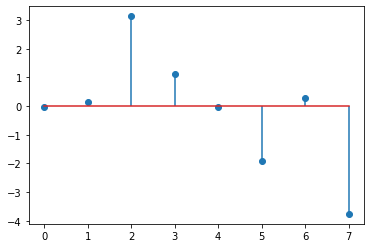

In [7]:
W = logreg2.coef_
W = W.ravel()
#W = W.reshape(-1) # alternative
plt.stem(W);
print(W)

In [8]:
from sklearn import linear_model, preprocessing

logreg = LogisticRegression(C=1e-3,solver='liblinear',penalty="l1",warm_start=True,class_weight='balanced')
logreg.fit(Xtr_standardized,ytr);
yhat = logreg.predict(Xtr_standardized)
score = roc_auc_score(ytr,logreg.decision_function(Xtr_standardized))
# score = roc_auc_score(ytr, yhat)
print('AUC score on the training data is {0:f}'.format(score))

logreg.fit(X_train_std, y_train_std)
yhat = logreg.predict(X_test_std)
score = roc_auc_score(y_test_std,logreg.decision_function(X_test_std))
# score = roc_auc_score(ytr, yhat)
print('AUC on the testing data is {0:f}'.format(score))

AUC score on the training data is 0.500000
AUC on the testing data is 0.500000


[0. 0. 0. 0. 0. 0. 0. 0.]


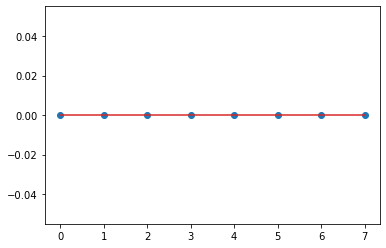

In [9]:
W2 = logreg.coef_
W2 = W2.ravel()
#W = W.reshape(-1) # alternative
plt.stem(W2);
print(W2)

#### Cross Validation

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# TODO

# Instantiate KFold object
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True,random_state=1)

# Do cross-validation
cv_results = cross_val_score(logreg2, Xtr_standardized, ytr, cv=kf, scoring="roc_auc")

auc = cv_results

# Take average
aucm= np.mean(auc)

# Compute the standard errors
auc_se = np.std(auc,ddof=1)/np.sqrt(nfold)

print('AUC =  {0:.4f}, SE={1:.4f}'.format(aucm, auc_se))

AUC =  0.8220, SE=0.0052


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# TODO

# Instantiate KFold object
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True,random_state=1)

# Do cross-validation
cv_results = cross_val_score(logreg, Xtr_standardized, ytr, cv=kf, scoring="roc_auc")

auc = cv_results

# Take average
aucm= np.mean(auc)

# Compute the standard errors
auc_se = np.std(auc,ddof=1)/np.sqrt(nfold)

print('AUC =  {0:.4f}, SE={1:.4f}'.format(aucm, auc_se))

AUC =  0.5000, SE=0.0000


### L1 regularization tuned with GridSearchCV and a pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# build pipeline for L1LogReg+FeaturesSelect+LogReg
pipe = Pipeline([
  ('featsel',SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear',warm_start=True,multi_class='ovr'))),
  ('logreg', LogisticRegression(C=1e-3))
])

# tune L1LogReg regularization strength
npen = 25
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True,random_state=1)
C_lasso = np.logspace(-3,1,npen) # grid of C values
parameters = {'featsel__estimator__C':C_lasso}
gscv = GridSearchCV(pipe, parameters, cv=kf, scoring='roc_auc')
gscv.fit(Xtr_standardized,ytr);



C at which error rate is minimum = 0.6812920690579608
Accuracy via 10-fold CV is 0.812783 with SE=  4.0439e-03


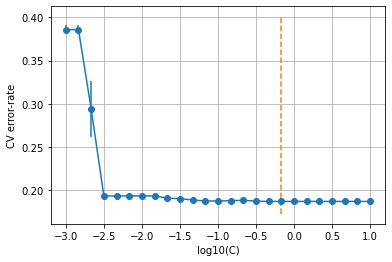

In [13]:
# TODO
# C_min = 

# Average test results across folds
err_mean = 1-gscv.cv_results_['mean_test_score']
err_se = gscv.cv_results_['std_test_score']/np.sqrt(nfold-1)
imin = np.argmin(err_mean)
C_min = C_lasso[imin]

# Plot error statistics versus C
plt.errorbar(np.log10(C_lasso), err_mean, marker='o',yerr=err_se)
xmin, xmax, ymin, ymax = plt.axis()
plt.plot(np.log10([C_min,C_min]),[ymin,ymax],'--')

plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('CV error-rate')

print("C at which error rate is minimum = " + str(C_min))
print("Accuracy via 10-fold CV is %f with SE=%12.4e" % (1-err_mean[imin],err_se[imin]))

Total number of coefficients = [-0.04238512  0.14811059  3.13752377  1.11768252 -0.01599521 -1.91799525
  0.29498086 -3.76391444]
Selected number of coefficients = 8


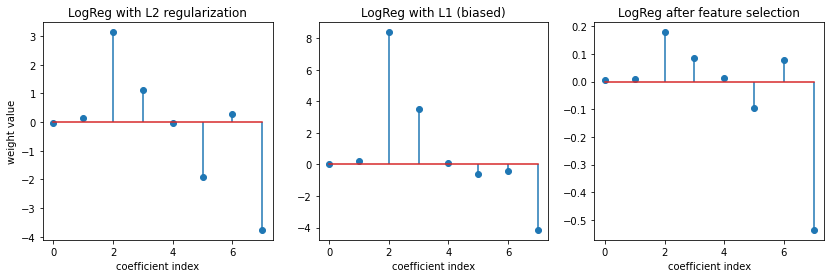

In [14]:
# best estimator
pipe_best = gscv.best_estimator_ 

# L1LogReg coefficients
W_l1 = pipe_best.named_steps["featsel"].estimator_.coef_

# selected features
support = pipe_best.named_steps["featsel"].get_support()

# LogReg coefficients
W_pipe = np.zeros(W_l1.shape)
W_pipe[:,support] = pipe_best.named_steps["logreg"].coef_

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.stem(W[:])
plt.title('LogReg with L2 regularization')
plt.ylabel('weight value')
plt.xlabel('coefficient index')
plt.subplot(1,3,2)
plt.stem(W_l1[0,:])
plt.title('LogReg with L1 (biased)')
plt.xlabel('coefficient index')
plt.subplot(1,3,3)
plt.stem(W_pipe[0,:])
plt.title('LogReg after feature selection')
plt.xlabel('coefficient index')

print('Total number of coefficients = '+str(W))
print('Selected number of coefficients = '+str(np.sum(support)))

In [15]:
Xtr_fs = np.loadtxt(Xtr_loadpath, usecols= {2,3,7}, delimiter=",")
Xtr_standardized_fs = scale.fit_transform(Xtr_fs) # revise this line as needed
X_train_fs, X_test_fs, y_train_fs,y_test_fs = train_test_split(Xtr_standardized_fs, ytr_standardized, test_size = 0.2, random_state = 10)

logreg = LogisticRegression(C=C_min,solver='liblinear',penalty="l1",warm_start=True,class_weight='balanced')
logreg.fit(Xtr_standardized_fs,ytr);
yhat = logreg.predict(Xtr_standardized_fs)
score = roc_auc_score(ytr,logreg.decision_function(Xtr_standardized_fs))
# score = roc_auc_score(ytr, yhat)
print('AUC score on the training data is {0:f}'.format(score))

logreg.fit(X_train_fs, y_train_fs)
yhat = logreg.predict(X_test_fs)
score = roc_auc_score(y_test_fs,logreg.decision_function(X_test_fs))
# score = roc_auc_score(ytr, yhat)
print('AUC on the testing data is {0:f}'.format(score))

AUC score on the training data is 0.824061
AUC on the testing data is 0.810378


## Part (2) Applying SVC/SVM 

In [16]:
from sklearn import svm

svc = svm.SVC(probability=False,  kernel="rbf", C=20, gamma=.2, verbose=10)
svc.fit(Xtr_standardized,ytr)
yhat = svc.predict(Xtr_standardized)
score = roc_auc_score(ytr,svc.decision_function(Xtr_standardized))
# score = roc_auc_score(ytr, yhat)
print('AUC on the training data is {0:f}'.format(score))


[LibSVM]AUC on the training data is 0.873171


In [17]:
#C_test = [0.1, 1, 10, 15, 20, 25, 50]
C_test = [18, 20, 22]
#gam_test = [0.001, 0.01, 0.1,0.00001,0.05]
gam_test = [0.18, 0.2, 0.22]
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True,random_state=1)

param_grid = {'C' : C_test, 'gamma': gam_test, 'kernel' : ['rbf']}
clf = GridSearchCV(svm.SVC(), param_grid = param_grid, cv = kf, verbose=10)
clf.fit(Xtr_standardized,ytr)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START C=18, gamma=0.18, kernel=rbf...............................
[CV 1/10; 1/9] END C=18, gamma=0.18, kernel=rbf;, score=0.812 total time=   2.7s
[CV 2/10; 1/9] START C=18, gamma=0.18, kernel=rbf...............................
[CV 2/10; 1/9] END C=18, gamma=0.18, kernel=rbf;, score=0.798 total time=   2.6s
[CV 3/10; 1/9] START C=18, gamma=0.18, kernel=rbf...............................
[CV 3/10; 1/9] END C=18, gamma=0.18, kernel=rbf;, score=0.822 total time=   2.6s
[CV 4/10; 1/9] START C=18, gamma=0.18, kernel=rbf...............................
[CV 4/10; 1/9] END C=18, gamma=0.18, kernel=rbf;, score=0.823 total time=   2.6s
[CV 5/10; 1/9] START C=18, gamma=0.18, kernel=rbf...............................
[CV 5/10; 1/9] END C=18, gamma=0.18, kernel=rbf;, score=0.813 total time=   2.6s
[CV 6/10; 1/9] START C=18, gamma=0.18, kernel=rbf...............................
[CV 6/10; 1/9] END C=18, gamma=0.18, kernel=rbf;

[CV 1/10; 6/9] END C=20, gamma=0.22, kernel=rbf;, score=0.811 total time=   2.5s
[CV 2/10; 6/9] START C=20, gamma=0.22, kernel=rbf...............................
[CV 2/10; 6/9] END C=20, gamma=0.22, kernel=rbf;, score=0.803 total time=   2.6s
[CV 3/10; 6/9] START C=20, gamma=0.22, kernel=rbf...............................
[CV 3/10; 6/9] END C=20, gamma=0.22, kernel=rbf;, score=0.826 total time=   2.8s
[CV 4/10; 6/9] START C=20, gamma=0.22, kernel=rbf...............................
[CV 4/10; 6/9] END C=20, gamma=0.22, kernel=rbf;, score=0.825 total time=   2.6s
[CV 5/10; 6/9] START C=20, gamma=0.22, kernel=rbf...............................
[CV 5/10; 6/9] END C=20, gamma=0.22, kernel=rbf;, score=0.817 total time=   2.6s
[CV 6/10; 6/9] START C=20, gamma=0.22, kernel=rbf...............................
[CV 6/10; 6/9] END C=20, gamma=0.22, kernel=rbf;, score=0.832 total time=   2.5s
[CV 7/10; 6/9] START C=20, gamma=0.22, kernel=rbf...............................
[CV 7/10; 6/9] END C=20, gam

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [18, 20, 22], 'gamma': [0.18, 0.2, 0.22],
                         'kernel': ['rbf']},
             verbose=10)

In [18]:
print("Best parameter: " + str(clf.best_params_))
print("Best score: " + str(clf.best_score_))

Best parameter: {'C': 22, 'gamma': 0.22, 'kernel': 'rbf'}
Best score: 0.8206


In [19]:
svc = svm.SVC(probability=False,  kernel="rbf", C=20, gamma=0.2, verbose=1)
svc.fit(Xtr_standardized,ytr)
yhat = svc.predict(Xtr_standardized)
score = roc_auc_score(ytr,svc.decision_function(Xtr_standardized))
# score = roc_auc_score(ytr, yhat)
print('AUC on the training data is {0:f}'.format(score))

svc.fit(X_train_std, y_train_std)
#preds = svc.predict(X_test_std)
score = roc_auc_score(y_test_std,svc.decision_function(X_test_std))
# score = roc_auc_score(ytr, yhat)
print('AUC on the testing data is {0:f}'.format(score))


[LibSVM]AUC on the training data is 0.873171
[LibSVM]AUC on the testing data is 0.849093


In [20]:
#Feature Selection

XtrBest = SelectKBest(score_func=f_classif,k=5).fit_transform(Xtr,ytr)
XtsBest = np.loadtxt(Xts_loadpath,delimiter = ",", usecols = (2,3,5,6,7))

Xtr_standardized_fs = scale.fit_transform(XtrBest) # revise this line as needed
Xts_standardized_fs = scale.fit_transform(XtsBest) # revise this line as needed
X_train, X_test, y_train,y_test = train_test_split(Xtr_standardized_fs, ytr_standardized, test_size = 0.2)

Xtr_savepath = 'Xtr_sklearn.csv'
Xts_savepath = 'Xts_sklearn.csv'
ytr_savepath = 'ytr_sklearn.csv'
yts_hat_savepath = 'yts_hat_sklearn.csv'

np.savetxt(Xtr_savepath, Xtr_standardized_fs, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized_fs, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")



svc = svm.SVC(probability=False,  kernel="rbf", C=20, gamma=0.2, verbose=1)
svc.fit(Xtr_standardized_fs,ytr)
yhat = svc.predict(Xtr_standardized_fs)
score = roc_auc_score(ytr,svc.decision_function(Xtr_standardized_fs))
# score = roc_auc_score(ytr, yhat)
print('AUC on the training data is {0:f}'.format(score))

svc.fit(X_train, y_train)
#preds = svc.predict(X_test_std)
score = roc_auc_score(y_test,svc.decision_function(X_test))
# score = roc_auc_score(ytr, yhat)
print('AUC on the testing data is {0:f}'.format(score))

[LibSVM]AUC on the training data is 0.873597
[LibSVM]AUC on the testing data is 0.884489


In [21]:
import pickle
import bz2

# save the model: you must use the .bz2 format for sklearn models!
model_savepath = 'model.bz2'
with bz2.BZ2File(model_savepath, 'w') as f:
    pickle.dump(svc,f)

In [22]:
# generate kaggle submission file using the validation script
!python {"validation.py " + model_savepath + " --Xts_path " + Xts_savepath + " --Xtr_path " + Xtr_savepath + " --yts_hat_path " + yts_hat_savepath } 

training auc =  0.8724864463067492
test label confidences saved in yts_hat_sklearn.csv
